# Correlation

Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.

## Pearson's Correlation Coefficient

The goal of this test is to answer the question: Do two continuous samples have a linear relationship?

For all hypothesis tests, we will follow the same process:

1. Form hypotheses and set a desired confidence level
1. Calculate the appropriate test statistics and p-value
1. Conclude based on the above statistics

To answer this question, we will take the following steps:

1. Calculate the Pearson correlation coefficient, $r_{xy}$
1. Calculate the corresponding t-values
1. Test whether the t-values are significant or not

or in one step:

1. Use `stats.pearsonr`

In this lesson, we will be looking at a dataset of student scores on an exam.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


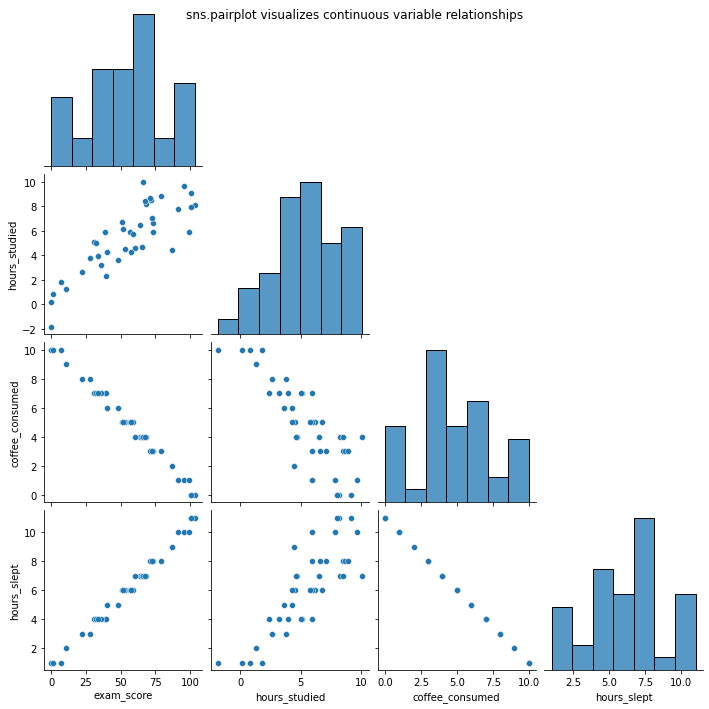

In [2]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

### Example

Is there a correlation between the number of hours studied and exam score?

**1. Form hypotheses and set a desired confidence level**

When performing a correlation test, our null hypothesis is that there is no linear correlation between the two variables.

$H_0$: There is no linear correlation between the number of hours studied and the score on the exam.

$H_a$: There is a linear relationship between the number of hours studied and the score on the exam.

We will choose some values for our confidence interval and, based on that value, our alpha.

In [25]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

**2. Calculate the appropriate test statistics and p-value**

*Pearson Correlation Coefficient*

The correlation coefficient, $r_{xy}$ is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation. 

We will calculate the correlation between hours studied and exam score.

$$
r_{xy} = \frac{\frac{1}{n} \sum(x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}
$$

In [36]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.8351498542413306

*Calculate the corresponding p-value*

We can calculate a t-statistic for our correlation coefficient in order to inform us how likely it is that we observed this result due to chance. We will then use this t-statistic to find our p-value.

The t-value can be positive for positive correlations and negative for negative correlations, and is given by:

$$ t = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^{2}_{xy}}} $$

Where $n - 2$ is our degrees of freedom.

In [37]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

9.359998377263368

Once we have our t-statistic, we can find our p-value by looking up the t-statistic in a t-table, or by using scipy's `t` distribution:

In [38]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

2.0762953315463266e-11

**3. Conclude based on the above statistics**

Lastly, we compare our p value to our alpha that we selected earlier:

In [39]:
p < α

True

Since p is less than alpha, we reject our null hypothesis that there is no linear correlation between the number of hours studied and exam score.

### The Easy Way

All of the work that we did above is also provided by scipy's `stats` module using the `pearsonr` function.

**1. Form hypotheses and set a desired confidence level**

$H_0$: There is no linear correlation between the number of hours studied and the score on the exam.

$H_a$: There is a linear relationship between the number of hours studied and the score on the exam.

In [40]:
alpha = 0.05

**2. Calculate the appropriate test statistics and p-value**

In [41]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.8351498542413308, 2.0762953315462545e-11)

**3. Conclude based on the above statistics**

In [35]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Correlation Gotchas

When working with correlation, keep in mind:

1. Correlation is not causality.
1. Correlation measures *linear* relationship between the 2 variables. However, there may be other types of relationships, such as a quadratic or absolute value relationship.
1. Correlations can be misleading when confounding variables are ignored.
1. Correlation tells you nothing about how large the relationship is.

### Correlation is Not Causation

Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.

### Nonlinear Relationship

Here we'll look at an example of a nonlinear relationship:

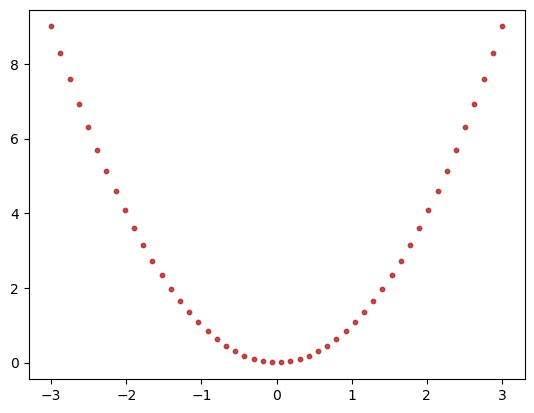

In [13]:
x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=10, c='firebrick', alpha=.8);

We see that there is clearly a direct relationship between x and y, however it is not a linear relationship, so a correlation test will not give us significant results.

In [14]:
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

r = -0.00000
p = 1.0


### Confounding Variables

We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.

In our exam score data, if we look at coffee consumption and exam score, we see that they are strongly negatively correlated:

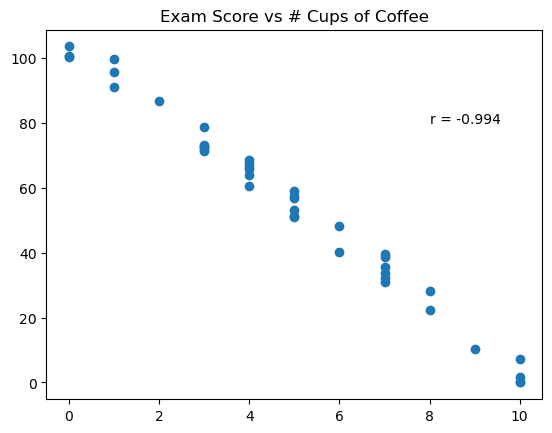

In [15]:
r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)
    
plt.scatter(df.coffee_consumed, df.exam_score)
plt.title('Exam Score vs # Cups of Coffee')
plt.text(8, 80, f'r = {r:.3f}')
plt.show()

However, it is probably the case that a third variable here has more influence, the number of hours that each student slept before the exam. We know that getting a good night's sleep improves exam scores, and if you don't get a good night's sleep, you are probably likely to drink more coffee.

In [16]:
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}')

Correlation between hours slept and coffee consumed
  r = -1.000
Correlation between hours slept and exam score
  r = 0.994


### Scale of the Relationship

The correlation coefficient shows us how linearly correlated two variables are, but doesn't tell us the scale. That is one variable could increase/decrease in lock step with another, but the size of the change could be tiny.

Imagine our data was a little different and we tracked several student's coffee intake before an exam. The coffee consumption could be perfectly correlated with exam score, but to such a small amount that it doesn't matter.

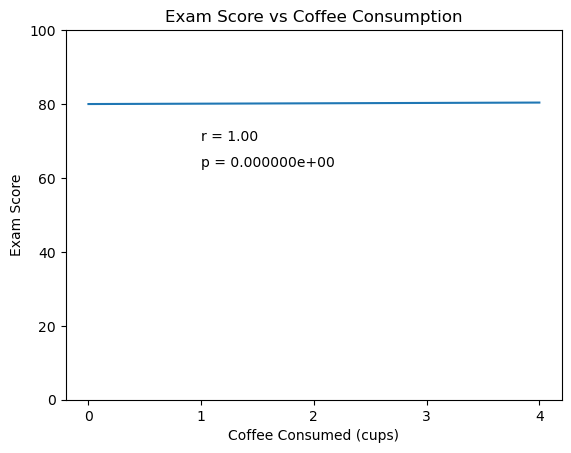

In [17]:
cups_of_coffee = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]
r, p = stats.pearsonr(cups_of_coffee, exam_score)

plt.plot(cups_of_coffee, exam_score)
plt.title('Exam Score vs Coffee Consumption')
plt.ylim(0, 100)
plt.xticks(range(5))
plt.xlabel('Coffee Consumed (cups)')
plt.ylabel('Exam Score')

plt.text(1, 70, f'r = {r:.2f}')
plt.text(1, 63, f'p = {p:e}')
plt.show()

## What about nonlinear correlations between variables?
- Use [Spearman's R](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html), for a nonparametric test of linearity, as long as we have monotonicity. 

## Further Reading

- [Examples of Spurious Correlations](http://www.tylervigen.com/spurious-correlations)
- [The Harvard Business Review: Beware Spurious Correlations](https://hbr.org/2015/06/beware-spurious-correlations)

## Exercises

Continue working in your `hypothesis_testing` notebook.

1. Answer with the type of stats test you would use (assume normal distribution): 
    - Is there a relationship between the length of your arm and the length of your foot?
    - Does smoking affect when or not someone has lung cancer? 
    - Is gender independent of a person’s blood type?
    - Does whether or not a person has a cat or dog affect whether they live in an apartment? 
    - Does the length of time of the lecture correlate with a student's grade? 
    
2. Use the `telco_churn` data. 
    - Does tenure correlate with monthly charges? 
    - Total charges? 
    - What happens if you control for phone and internet service?
3. Use the `employees` database.
    - Is there a relationship between how long an employee has been with the company and their salary?
    - Is there a relationship between how long an employee has been with the company and the number of titles they have had?
4. Use the `sleepstudy` data. 
    - Is there a relationship between days and reaction time?